In [2]:
import os, struct
import matplotlib as plt
from array import array as pyarray
import pandas as pd
import operator
from openpyxl import load_workbook
from pylab import *
from numpy import *
from sklearn import tree
import graphviz

In [3]:
def load_NMNIST(dataset="training", digits=range(10), path=r'C:\Users\Nijith\Documents\Studies\UCB\ML using python\Final Project'):
    
    if dataset == "training":
        fname_img = os.path.join(path, 'NMNIST_Train_Features.dat')
        fname_lbl = os.path.join(path, 'NMNIST_Train_Labels.dat')
    elif dataset == "testing":
        fname_img = os.path.join(path, 'NMNIST_Test_Features.dat')
        fname_lbl = os.path.join(path, 'NMNIST_Test_Labels.dat')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    lbl = np.fromfile(flbl, dtype=np.uint8)
    flbl.close()

    fimg = open(fname_img, 'rb')
    img = np.fromfile(fimg, dtype=np.uint8)
    fimg.close()

    size=len(lbl)

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    rows=28;cols=28;

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]
    return images, labels

In [4]:
def vectortoimg(v,show=True):
    plt.imshow(v.reshape(28, 28),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

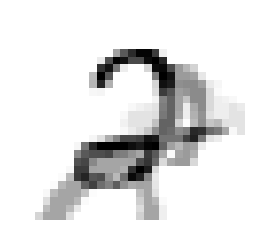

In [5]:
images, labels = load_NMNIST('training',digits=[2,3])

flatimages = list()
for i in images:
    flatimages.append(i.ravel())
X = asarray(flatimages)
T=labels
vectortoimg(X[1])

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, T)

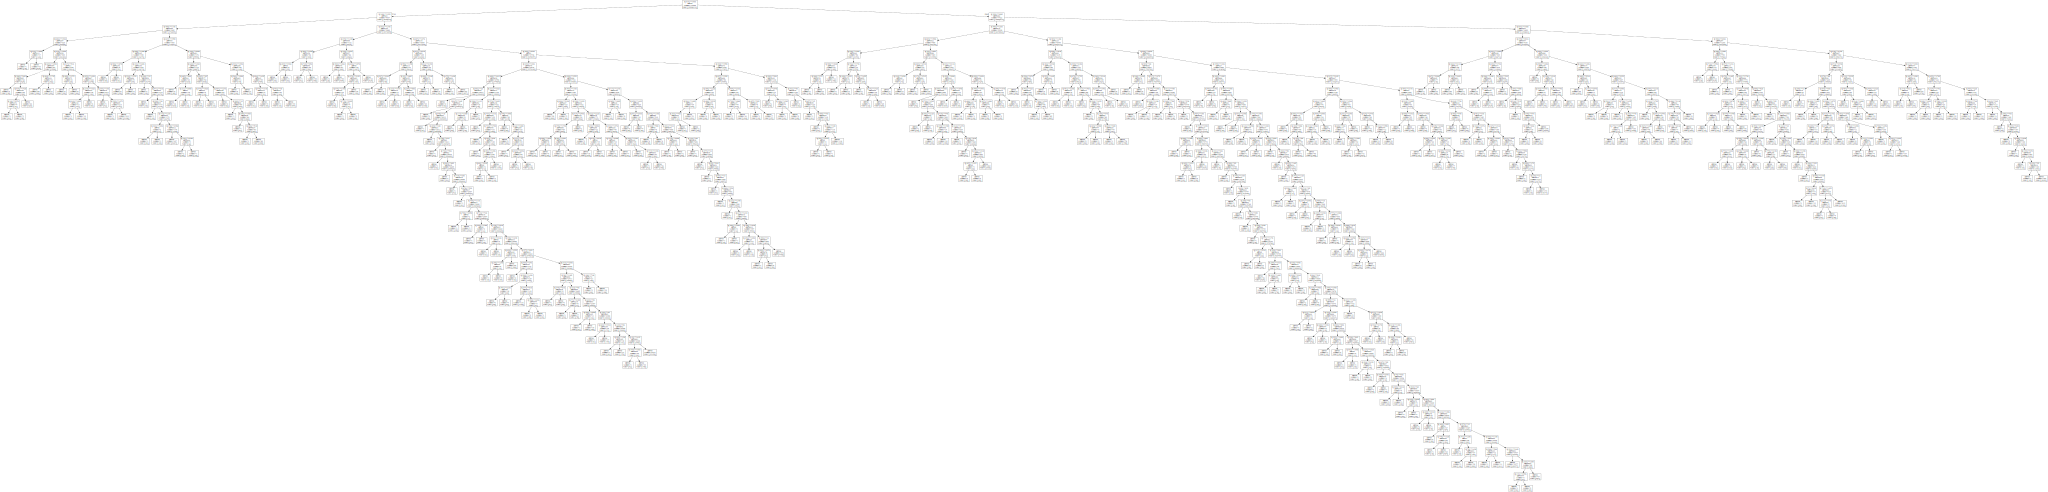

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph